In [1]:
import tensorflow as tf
import tensorflow.keras.utils as ku
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [2]:
tokenizer = Tokenizer()

data = open('./sonnets.txt').read()
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequences = token_list[:i+1]
        input_sequences.append(n_gram_sequences)
        
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

predictors, labels = input_sequences[:,:-1], input_sequences[:,-1]

label = ku.to_categorical(labels, num_classes=total_words)

In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))

adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                51360     
_________________________________________________________________
dense (Dense)                (None, 1605)              65805     
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 5,896,331
Trainable params: 5,896,331
Non-trainable params: 0
______________________________________________

In [4]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 42s 14ms/step - loss: 7.0142 - accuracy: 0.0193
Epoch 2/100
484/484 [==============================] - 6s 13ms/step - loss: 6.4715 - accuracy: 0.0242
Epoch 3/100
484/484 [==============================] - 7s 14ms/step - loss: 6.4064 - accuracy: 0.0296
Epoch 4/100
484/484 [==============================] - 6s 13ms/step - loss: 6.3324 - accuracy: 0.0288
Epoch 5/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2600 - accuracy: 0.0320
Epoch 6/100
484/484 [==============================] - 7s 14ms/step - loss: 6.2560 - accuracy: 0.0317
Epoch 7/100
484/484 [==============================] - 7s 14ms/step - loss: 6.2582 - accuracy: 0.0300
Epoch 8/100
484/484 [==============================] - 6s 13ms/step - loss: 6.1683 - accuracy: 0.0356
Epoch 9/100
484/484 [==============================] - 7s 13ms/step - loss: 6.1440 - accuracy: 0.0372
Epoch 10/100
484/484 [==============================] - 7s 14ms/step - loss: 6.12

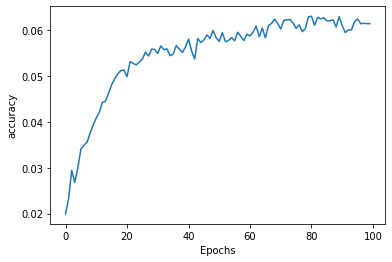

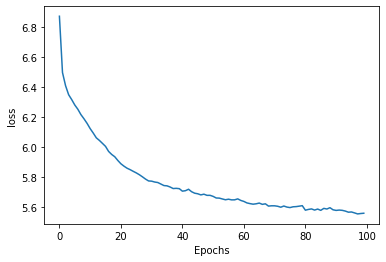

In [5]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
plot_graph(history,'accuracy')
plot_graph(history,'loss')

In [7]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    
print()
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



Help me Obi Wan Kenobi, you're my only hope and in the world to be and thou love to thee to thee to thee ' ' ' in the love of thee to the love of my love to be and ' ' ' ' ' in the ' ' ' and in the world to be and thou love to thee to thee to thee ' ' ' in the love of thee to the love of my love to be and ' ' ' ' ' in the ' ' ' and in the world to be and thou love to thee to thee to thee '
